Importing all important modules

In [34]:
import pandas as pd
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score,classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

Reading dataset using pandas

In [3]:
risk=pd.read_csv(r"CreditRisk59.csv")
risk.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


All about dataset

In [4]:
risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    float64
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        981 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 99.8+ KB


Finding out nulls in dataset

In [5]:
risk.isnull().sum()[risk.isnull().sum()>0]

Gender              24
Married              3
Dependents          25
Self_Employed       55
LoanAmount          27
Loan_Amount_Term    20
Credit_History      79
dtype: int64

Removing unnecessary feature

In [6]:
risk.drop("Loan_ID",inplace=True,axis=1)

Replacing Nulls in columns with categorical data with mode

In [8]:
risk["Gender"]=risk["Gender"].fillna(risk["Gender"].mode()[0])  
risk["Married"]=risk["Married"].fillna(risk["Married"].mode()[0])
risk["Self_Employed"]=risk["Self_Employed"].fillna(risk["Self_Employed"].mode()[0])
risk["Dependents"]=risk["Dependents"].fillna(risk["Dependents"].mode()[0])
risk["Credit_History"]=risk["Credit_History"].fillna(risk["Credit_History"].mode()[0])

Finding out outlier values in above columns using Inter-Quartile Range (IQR)

In [9]:
def find_outliers(df,col):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-(1.5*iqr)
    upper_bound=q3+(1.5*iqr)
    outliers=df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].tolist()
    return outliers

In [10]:
cols_to_check=['LoanAmount','Loan_Amount_Term']
for col in cols_to_check:
    outlier_values=find_outliers(risk,col)
    print(f"Outliers in {col}: {len(outlier_values)}")

Outliers in LoanAmount: 65
Outliers in Loan_Amount_Term: 138


plotting outliers 

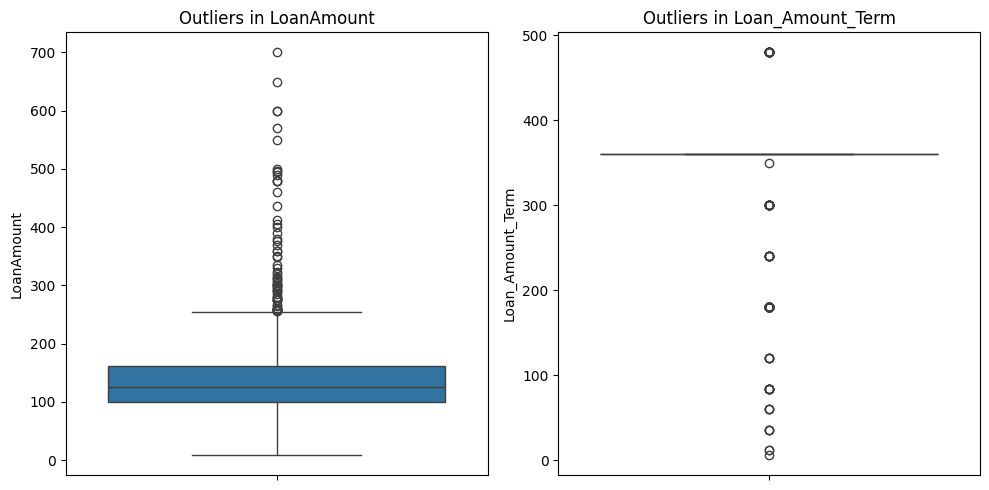

In [11]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.boxplot(y=risk['LoanAmount'])
plt.title("Outliers in LoanAmount")

plt.subplot(1,2,2)
sns.boxplot(y=risk['Loan_Amount_Term'])
plt.title("Outliers in Loan_Amount_Term")

plt.tight_layout()
plt.show()

Replacing nulls in above columns with median

In [12]:
risk["Loan_Amount_Term"]=risk["Loan_Amount_Term"].fillna(risk["Loan_Amount_Term"].median())
risk["LoanAmount"]=risk["LoanAmount"].fillna(risk["LoanAmount"].median())

In [13]:
risk.isnull().sum()[risk.isnull().sum()>0]


Series([], dtype: int64)

Viewing pre-processed data

In [16]:
risk.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Label encoding

In [17]:
risk.Gender.replace({"Female":0,"Male":1},inplace=True)
risk.Married.replace({"No":0,"Yes":1},inplace=True)
risk.Education.replace({"Graduate":0,"Not Graduate":1},inplace=True)
risk.Self_Employed.replace({"No":0,"Yes":1},inplace=True)
risk.Property_Area.replace({"Rural":0,"Semiurban":1,"Urban":2},inplace=True)
risk.Loan_Status.replace({"N":0,"Y":1},inplace=True)
risk.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,126.0,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


EDA

<Axes: xlabel='Loan_Status', ylabel='count'>

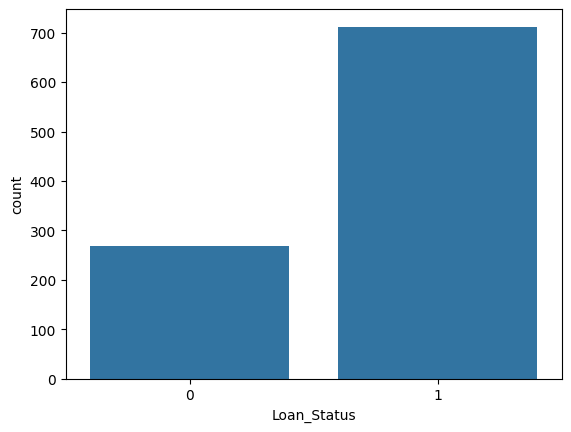

In [30]:
sns.countplot(x='Loan_Status',data=risk)

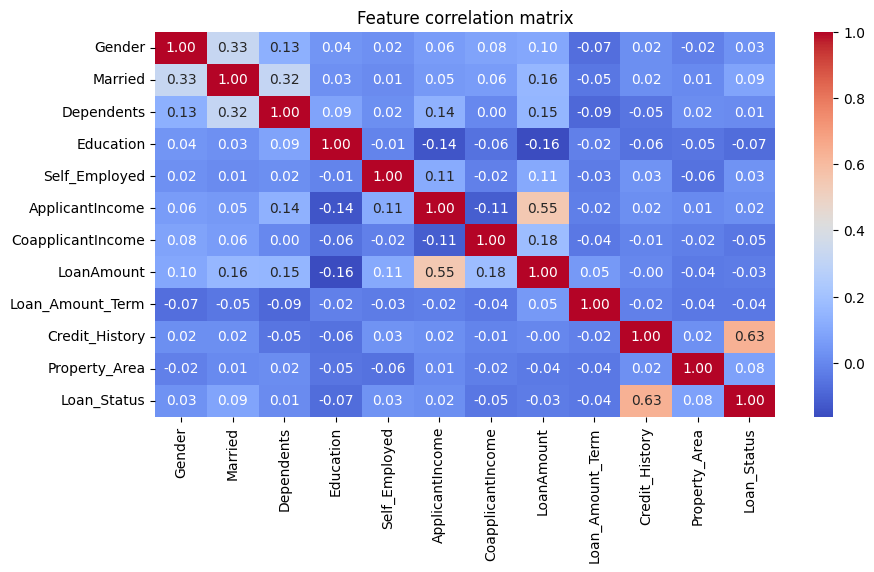

In [33]:
numeric_cols=risk.select_dtypes(include='number')
plt.figure(figsize=(10,5))
sns.heatmap(numeric_cols.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Feature correlation matrix")
plt.show()

Splitting data into training and testing data

In [18]:
risk_train,risk_test=train_test_split(risk,test_size=0.2)

Finding out value counts in target variable i.e. Loan_Status

In [19]:
risk_train.Loan_Status.value_counts()

Loan_Status
1    555
0    229
Name: count, dtype: int64

Fixing oversampling

In [20]:
risk_0=risk_train[risk_train.Loan_Status==0]
risk_train=pd.concat([risk_train,risk_0])
risk_train.Loan_Status.value_counts()

Loan_Status
1    555
0    458
Name: count, dtype: int64

Separating dependent and independent variables form training and testing data

In [21]:
risk_train_x=risk_train.iloc[:,:-1]
risk_train_y=risk_train.iloc[:,-1]

risk_test_x=risk_test.iloc[:,:-1]
risk_test_y=risk_test.iloc[:,-1]

In [22]:
risk_test_x.shape

(197, 11)

Training Support vector classifier model

In [23]:
svc=SVC(kernel='linear')
svc.fit(risk_train_x,risk_train_y)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


Predicting values using training dataset

In [24]:
predicted_values=svc.predict(risk_test_x)

Checking performance measures of the model

In [25]:
matrix=confusion_matrix(risk_test_y,predicted_values)
matrix

array([[ 24,  16],
       [ 20, 137]])

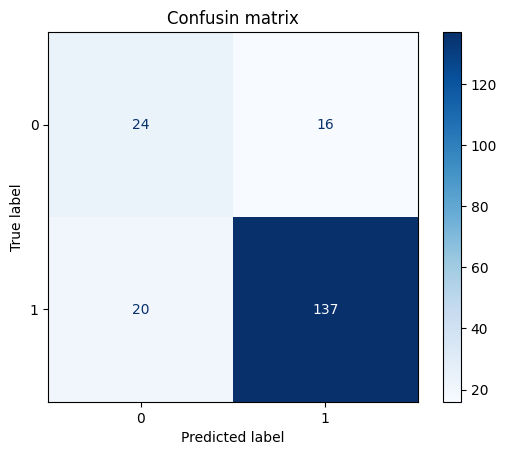

In [35]:
display_matrix=ConfusionMatrixDisplay(confusion_matrix=matrix)
display_matrix.plot(cmap='Blues')
plt.title("Confusin matrix")
plt.show()

In [26]:
accuracy_score(risk_test_y,predicted_values)

0.817258883248731

In [27]:
recall_score(risk_test_y,predicted_values)

0.8726114649681529

In [28]:
precision_score(risk_test_y,predicted_values)

0.8954248366013072

In [29]:
f1_score(risk_test_y,predicted_values)

0.8838709677419355

In [54]:
print(classification_report(risk_test_y,predicted_values))

              precision    recall  f1-score   support

           0       0.73      0.53      0.61        51
           1       0.85      0.93      0.89       146

    accuracy                           0.83       197
   macro avg       0.79      0.73      0.75       197
weighted avg       0.82      0.83      0.82       197

